In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/survey_results_public.csv')
schema_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/survey_results_schema.csv')
df.head()


Mounted at /content/drive


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [4]:
schema_data["selector"].value_counts()#

MAVR       23
SAVR       21
Likert     16
TB          9
DL          4
SL          3
Browser     1
HSLIDER     1
Name: selector, dtype: int64

First, we reveal the difference between the column names in schema and survey
datas.

In [7]:
first_array = np.array(df.columns)
second_array = np.array(schema_data["qname"])
first_array[~(np.isin(first_array, second_array))]


array(['ResponseId', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'AISearchHaveWorkedWith', 'AISearchWantToWorkWith',
       'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       'AIToolInterested in Using', 'AIToolCurrently Using',
       'AIToolNot interested in Using', 'AINextVery different',
       'AINextNeither different nor similar', 'AINextSomewhat similar',
       'AINextVery similar', 'AINextSomewhat diff

Each question is devided by section:
Section 1 / Basic Information Questions   ## Gramatikulad gasasworebeli iqneba




In [8]:
section1_df = schema_data.iloc[schema_data[schema_data["qname"] == "S1"].index[0]: schema_data[schema_data["qname"] == "S2"].index[0]]
section1_df

,qid,qname,question,force_resp,type,selector
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
5,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
6,QID127,Age,What is your age? *,True,MC,MAVR
7,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
8,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
9,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR


Section 2 / Education, Work and Career

In [9]:
section2_df = schema_data.iloc[schema_data[schema_data["qname"] == "S2"].index[0]: schema_data[schema_data["qname"] == "S3"].index[0]]
section2_df

,qid,qname,question,force_resp,type,selector
10,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
11,QID25,EdLevel,Which of the following best describes the high...,True,MC,SAVR
12,QID276,LearnCode,How do you learn to code? Select all that apply.,False,MC,MAVR
13,QID281,LearnCodeOnline,What online resources do you use to learn to c...,False,MC,MAVR
14,QID306,LearnCodeCoursesCert,What online courses or certifications do you u...,False,MC,MAVR
15,QID32,YearsCode,"Including any education, how many years have y...",False,MC,DL
16,QID34,YearsCodePro,"NOT including education, how many years have y...",False,MC,DL
17,QID31,DevType,Which of the following describes your current ...,False,MC,SAVR
18,QID29,OrgSize,Approximately how many people are employed by ...,False,MC,SAVR
19,QID278,PurchaseInfluence,"What level of influence do you, personally, ha...",False,MC,SAVR


Section 3 / Technology, Tech Culture


In [10]:
section3_df = schema_data.iloc[schema_data[schema_data["qname"] == "S3"].index[0]: schema_data[schema_data["qname"] == "S4"].index[0]]
section3_df

,qid,qname,question,force_resp,type,selector
25,QID61,S3,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
26,QID233,Language,"Which <b>programming, scripting, and markup la...",False,Matrix,Likert
27,QID262,Database,Which <b>database environments </b>have you do...,False,Matrix,Likert
28,QID263,Platform,Which <b>cloud platforms</b> have you done ext...,False,Matrix,Likert
29,QID264,Webframe,Which <b>web frameworks and web technologies</...,False,Matrix,Likert
30,QID265,MiscTech,Which <b>other frameworks and libraries</b> ha...,False,Matrix,Likert
31,QID275,ToolsTech,Which <b>developer </b><strong>tools for compi...,False,Matrix,Likert
32,QID274,NEWCollabTools,Which <strong>development environments</strong...,False,Matrix,Likert
33,QID71,OpSys,What is the primary <b>operating system</b> in...,False,Matrix,Likert
34,QID282,OfficeStackAsync,Which <b>collaborative work management and/or ...,False,Matrix,Likert


S4 / Stack Overflow Community

In [11]:
section4_df = schema_data.iloc[schema_data[schema_data["qname"] == "S4"].index[0]: schema_data[schema_data["qname"] == "S5"].index[0]]
section4_df

,qid,qname,question,force_resp,type,selector
38,QID91,S4,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
39,QID266,NEWSOSites,Which of the following Stack Overflow sites ha...,True,MC,MAVR
40,QID100,SOVisitFreq,How frequently would you say you visit Stack O...,False,MC,SAVR
41,QID101,SOAccount,Do you have a Stack Overflow account?,False,MC,SAVR
42,QID102,SOPartFreq,How frequently would you say you participate i...,False,MC,SAVR
43,QID106,SOComm,Do you consider yourself a member of the Stack...,False,MC,SAVR


Section 5 /  Artificial Intelligence



In [12]:
section5_df = schema_data.iloc[schema_data[schema_data["qname"] == "S5"].index[0]: schema_data[schema_data["qname"] == "S6"].index[0]]
section5_df

,qid,qname,question,force_resp,type,selector
44,QID313,S5,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
45,QID325,SOAI,Artificial Intelligence (AI) tools have gained...,False,TE,SL
46,QID314,AISelect,Do you currently use AI tools in your developm...,True,MC,SAVR
47,QID315,AISent,How favorable is your stance on using AI tools...,False,MC,SAVR
48,QID324,AIAcc,For the AI tools you use as part of your devel...,False,MC,MAVR
49,QID316,AIBen,How much do you trust the accuracy of the outp...,False,MC,SAVR
50,QID319,AITool,Which parts of your development workflow are y...,False,Matrix,Likert
51,QID320,AINext,Thinking about how your workflow and process c...,False,Matrix,Likert
52,QID321,AIOpen,Please describe how you would expect your work...,False,TE,SL


Section 6 / Professional Developer Series

In [13]:
section6_df = schema_data.iloc[schema_data[schema_data["qname"] == "S6"].index[0]: schema_data[schema_data["qname"] == "S7"].index[0]]
section6_df

,qid,qname,question,force_resp,type,selector
53,QID295,S6,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
54,QID299,TBranch,"<span style=""font-size:16px;"">Would you like t...",True,MC,SAVR
55,QID287,ICorPM,Are you an individual contributor or people ma...,False,MC,SAVR
56,QID288,WorkExp,How many years of working experience do you have?,False,Slider,HSLIDER
57,QID289,Knowledge,Please rate your level of agreement with the f...,False,Matrix,Likert
58,QID290,Frequency,How frequently do you experience each of the f...,False,Matrix,Likert
59,QID291,TimeSearching,"On an average day, how much time do you typica...",False,MC,SAVR
60,QID292,TimeAnswering,"On an average day, how much time do you typica...",False,MC,SAVR
61,QID304,ProfessionalTech,My company has:,False,MC,MAVR
62,QID326,Industry,What industry is the company you work for in?,False,MC,SAVR


Section 7 / Final Questions



In [14]:
section7_df = schema_data.iloc[schema_data[schema_data["qname"] == "S7"].index[0]:]
section7_df

,qid,qname,question,force_resp,type,selector
64,QID131,S7,"<span style=""font-size:22px;""><strong>Final Qu...",False,DB,TB
65,QID132,SurveyLength,How do you feel about the length of the survey...,False,MC,MAVR
66,QID133,SurveyEase,How easy or difficult was this survey to compl...,False,MC,MAVR
67,QID289,Knowledge_1,I have interactions with people outside of my ...,NaN,MC,MAVR
68,QID289,Knowledge_2,Knowledge silos prevent me from getting ideas ...,NaN,MC,MAVR
69,QID289,Knowledge_3,I can find up-to-date information within my or...,NaN,MC,MAVR
70,QID289,Knowledge_4,I am able to quickly find answers to my questi...,NaN,MC,MAVR
71,QID289,Knowledge_5,I know which system or resource to use to find...,NaN,MC,MAVR
72,QID289,Knowledge_6,I often find myself answering questions that I...,NaN,MC,MAVR
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR


In [15]:
georgia_data = df[df['Country'] == 'Georgia']


georgia_data.set_index('ResponseId', inplace=True)

print(georgia_data)

               Q120                      MainBranch              Age  \
ResponseId                                                             
422         I agree           I am learning to code  18-24 years old   
503         I agree  I am a developer by profession  35-44 years old   
740         I agree  I am a developer by profession  35-44 years old   
819         I agree  I am a developer by profession  35-44 years old   
1674        I agree  I am a developer by profession  35-44 years old   
...             ...                             ...              ...   
86065       I agree  I am a developer by profession  25-34 years old   
87401       I agree  I am a developer by profession  18-24 years old   
87734       I agree  I am a developer by profession  18-24 years old   
88410       I agree           I am learning to code  35-44 years old   
89028       I agree  I am a developer by profession  45-54 years old   

                                                   Employment  

I'm going to drop some of the columns which I don't use in the analysis. CHASASWOREBELIA EGI


---



In [37]:
mandatory_columns = ["MainBranch", "Country", "Currency", "EdLevel"]
georgia_data.dropna(subset=mandatory_columns, inplace=True)

dropped_labels = [ 'Q120' ,  'OrgSize','TimeSearching','TimeAnswering','TBranch', 'ICorPM','PurchaseInfluence', 'BuyNewTool']
georgia_data.drop(columns=dropped_labels, inplace=True)

print(georgia_data.columns)


Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities',
       'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert',
       'YearsCode', 'YearsCodePro', 'DevType', 'TechList', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       'NEWSOSi

<ipython-input-37-d949a0bd1513>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  georgia_data.dropna(subset=mandatory_columns, inplace=True)
<ipython-input-37-d949a0bd1513>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  georgia_data.drop(columns=dropped_labels, inplace=True)


In [38]:

print(georgia_data.columns)

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities',
       'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert',
       'YearsCode', 'YearsCodePro', 'DevType', 'TechList', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       'NEWSOSi

We must convert the multiple answered columns into a binary column, so we can understand and analyse these columns separately.


In [39]:



multiple_answer_columns = ['DevType',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith','DatabaseWantToWorkWith', 'PlatformHaveWorkedWith','PlatformWantToWorkWith', 'WebframeHaveWorkedWith','WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith','MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith','ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith','NEWCollabToolsWantToWorkWith', 'OpSysProfessional use', 'OpSysPersonal use',

       'OfficeStackAsyncHaveWorkedWith','OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith','OfficeStackSyncWantToWorkWith','AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       'ProfessionalTech']
for i in multiple_answer_columns:
    unique_values = df[i].unique()
    unique_values = [x for x in unique_values if type(x) != float]
    unique_list_values = []
    for j in unique_values:
        something = j.split(";")
        for k in something:
            unique_list_values.append(k)
    unique_list_array = np.array(unique_list_values)
    unique_list_array = np.unique(unique_list_array)
    for element in unique_list_array:
         df["{}_{}".format(i, element)] = np.nan

In [19]:
for i in multiple_answer_columns:
    semicolon_values =  df[ df[i].str.contains(";", na=False)][i].values
    semicolon_indexes = df[ df[i].str.contains(";", na=False)][i].index
    counter = 0
    for j in semicolon_values:
        element = j.split(";")
        for k in element:
             df.loc[semicolon_indexes[counter], "{}_{}".format(i, k)] = 1
        counter += 1
pd.options.display.float_format = '{:,.3f}'.format

CompTotal groupby DevType

In [40]:
grouped_data = georgia_data.groupby('DevType')


total_comp_by_devtype = grouped_data['CompTotal'].sum()



result_df = total_comp_by_devtype.reset_index()

result_df = result_df.merge(georgia_data[['DevType', 'Currency']], on='DevType', how='left')

print(result_df)

                                          DevType     CompTotal  \
0                                      Blockchain         0.000   
1                   Cloud infrastructure engineer    60,000.000   
2   Data scientist or machine learning specialist   282,250.000   
3   Data scientist or machine learning specialist   282,250.000   
4   Data scientist or machine learning specialist   282,250.000   
..                                            ...           ...   
83                        Other (please specify): 3,333,000.000   
84                        Other (please specify): 3,333,000.000   
85                        Other (please specify): 3,333,000.000   
86                    Research & Development role         0.000   
87           Senior Executive (C-Suite, VP, etc.)         0.000   

                     Currency  
0          GEL\tGeorgian lari  
1   USD\tUnited States dollar  
2          GEL\tGeorgian lari  
3   USD\tUnited States dollar  
4           EUR European Euro  
.. 

In [22]:
georgia_data['YearsCodePro'] = pd.to_numeric(georgia_data['YearsCodePro'], errors='coerce')


mean_yearscodepro = georgia_data['YearsCodePro'].mean()


mean_workexp = georgia_data['WorkExp'].mean()

print(f"Mean YearsCodePro: {mean_yearscodepro}")
print(f"Mean WorkExp: {mean_workexp}")

Mean YearsCodePro: 9.206896551724139
Mean WorkExp: 9.943181818181818


<ipython-input-22-7236f0d7bd34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  georgia_data['YearsCodePro'] = pd.to_numeric(georgia_data['YearsCodePro'], errors='coerce')


In [43]:

yearscodepro_F = 9
workexp_F = 9


filterrr = (georgia_data['YearsCodePro'] >= yearscodepro_F) & (georgia_data['WorkExp'] == workexp_F)


filtered_df = georgia_data.loc[filterrr, ['YearsCodePro', 'WorkExp']]

print(filtered_df)

            YearsCodePro  WorkExp
ResponseId                       
22268              9.000    9.000
27136              9.000    9.000
29513             12.000    9.000
47789             11.000    9.000
62814              9.000    9.000


Sorting age with comptotal


In [48]:
sorted_data = georgia_data.sort_values(by=['Age', 'CompTotal'])


col = sorted_data.loc[:, ['Age', 'CompTotal', 'Currency']]

print(col)



                        Age  CompTotal                   Currency
ResponseId                                                       
49285       18-24 years old  7,250.000         GEL\tGeorgian lari
50531       18-24 years old  9,000.000         GEL\tGeorgian lari
87401       18-24 years old 12,000.000         GEL\tGeorgian lari
72056       18-24 years old 14,000.000  USD\tUnited States dollar
12461       18-24 years old 30,000.000  USD\tUnited States dollar
...                     ...        ...                        ...
21697       35-44 years old        NaN         GEL\tGeorgian lari
29513       35-44 years old        NaN         GEL\tGeorgian lari
57364       35-44 years old        NaN         GEL\tGeorgian lari
10683       45-54 years old 50,000.000  USD\tUnited States dollar
89028       45-54 years old        NaN  USD\tUnited States dollar

[88 rows x 3 columns]


In [53]:

all_languages = []
for row in georgia_data['LanguageHaveWorkedWith']:
    languages = row.split(';')
    all_languages.extend(languages)


language_counts = pd.Series(all_languages).value_counts()


print(language_counts)


JavaScript                 51
HTML/CSS                   41
TypeScript                 37
SQL                        32
Python                     29
C#                         25
Bash/Shell (all shells)    22
PHP                        16
Go                         15
C++                        11
Rust                       10
Java                       10
Ruby                        9
C                           8
Kotlin                      8
PowerShell                  8
Swift                       8
Dart                        6
Elixir                      5
Lua                         4
Lisp                        3
Scala                       3
GDScript                    3
Erlang                      2
Julia                       2
R                           2
Solidity                    2
Delphi                      1
MATLAB                      1
Objective-C                 1
Assembly                    1
Clojure                     1
Zig                         1
Flow      

In [ ]:

all_wanted_languages = []

for row in georgia_data['LanguageWantToWorkWith']:
    if isinstance(row, str):
        wanted_languages = row.split(';')
        all_wanted_languages.extend(wanted_languages)


wanted_language_counts = pd.Series(all_wanted_languages).value_counts()

print(wanted_language_counts)


In [ ]:
all_WORKED_DB = []

for row in georgia_data['DatabaseHaveWorkedWith']:
    if isinstance(row, str):
        worked_DB = row.split(';')
        all_WORKED_DB.extend(worked_DB)


worked_DB = pd.Series(all_WORKED_DB).value_counts()

print(worked_DB)

In [ ]:
all_WNTD_DB = []

for row in georgia_data['DatabaseWantToWorkWith']:
    if isinstance(row, str):
        wntd_DB = row.split(';')  #
        all_WNTD_DB.extend(worked_DB)


wntd_DB = pd.Series(all_WNTD_DB).value_counts()

print(worked_DB)

Percent of why they currentyl useing AI for Each DEVtype

In [81]:

filtered_data = georgia_data.dropna(subset=['DevType', 'AIToolCurrently Using'])


grouped_data = filtered_data.groupby('DevType')


percentage_of_ai_users = (grouped_data['AIToolCurrently Using'].value_counts(normalize=True) * 100).reset_index(name='Percentage')

print(percentage_of_ai_users)


                                          DevType  \
0                                      Blockchain   
1                   Cloud infrastructure engineer   
2   Data scientist or machine learning specialist   
3   Data scientist or machine learning specialist   
4                               DevOps specialist   
5                             Developer, back-end   
6                             Developer, back-end   
7                             Developer, back-end   
8                             Developer, back-end   
9                             Developer, back-end   
10                            Developer, back-end   
11                            Developer, back-end   
12                            Developer, back-end   
13                            Developer, back-end   
14                            Developer, back-end   
15  Developer, desktop or enterprise applications   
16  Developer, desktop or enterprise applications   
17                           Developer, front-

In [65]:
grouped_data = georgia_data.groupby('DevType')


statistics_by_age = grouped_data['ConvertedCompYearly'].agg(['mean', 'std', 'median'])


print(statistics_by_age)

                                                    mean        std     median
DevType                                                                       
Blockchain                                           NaN        NaN        NaN
Cloud infrastructure engineer                 60,000.000        NaN 60,000.000
Data scientist or machine learning specialist 71,980.500 24,983.225 70,336.000
DevOps specialist                             56,019.000        NaN 56,019.000
Developer, QA or test                                NaN        NaN        NaN
Developer, back-end                           50,038.000 33,571.438 47,304.500
Developer, desktop or enterprise applications 57,666.667 14,977.761 62,000.000
Developer, front-end                          57,945.333 22,659.854 47,000.000
Developer, full-stack                         34,880.300 26,472.249 32,100.000
Developer, game or graphics                   54,696.500 14,769.147 57,127.000
Developer, mobile                             67,103

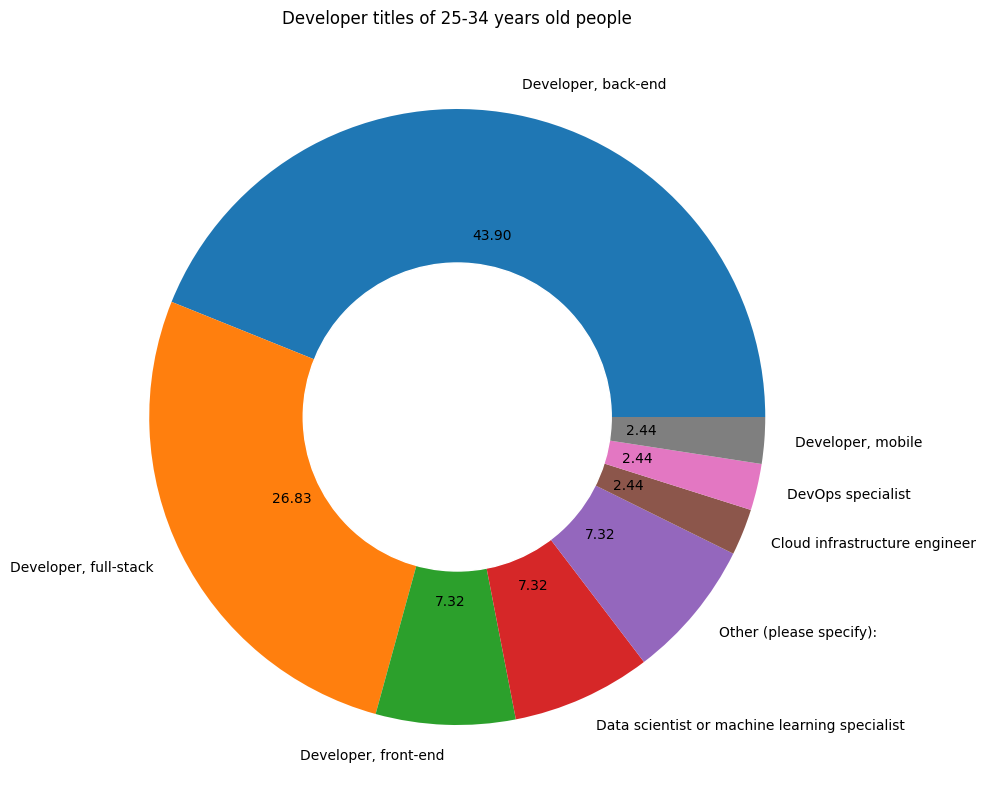

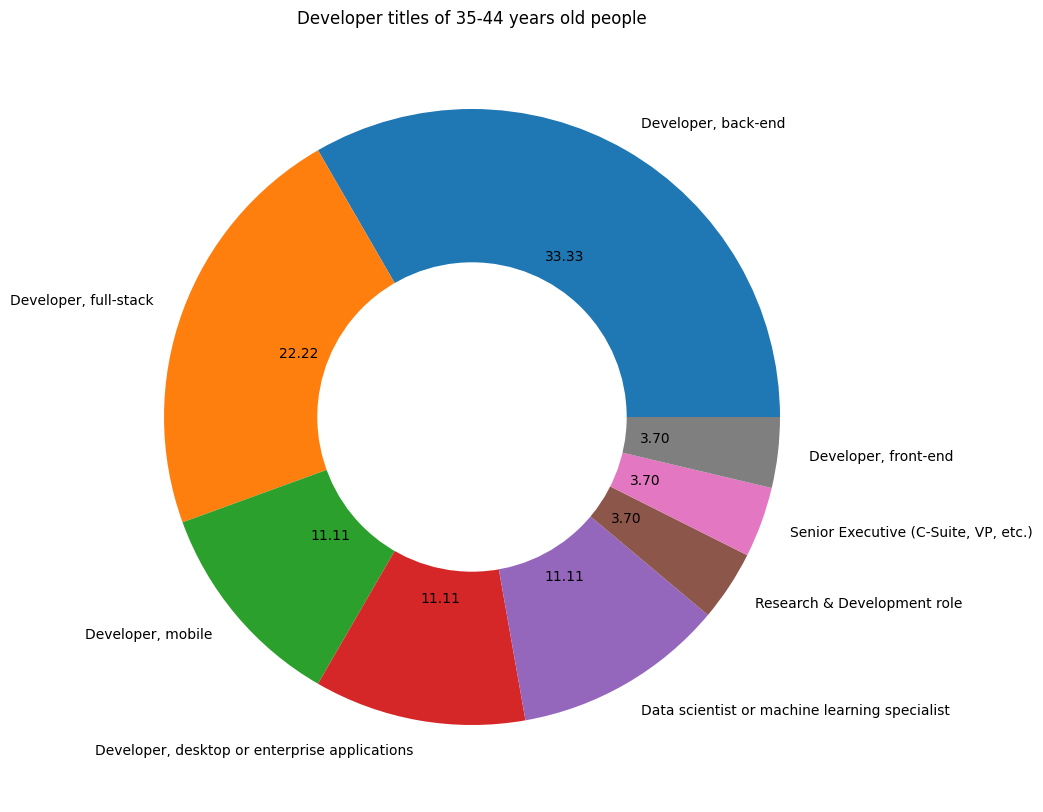

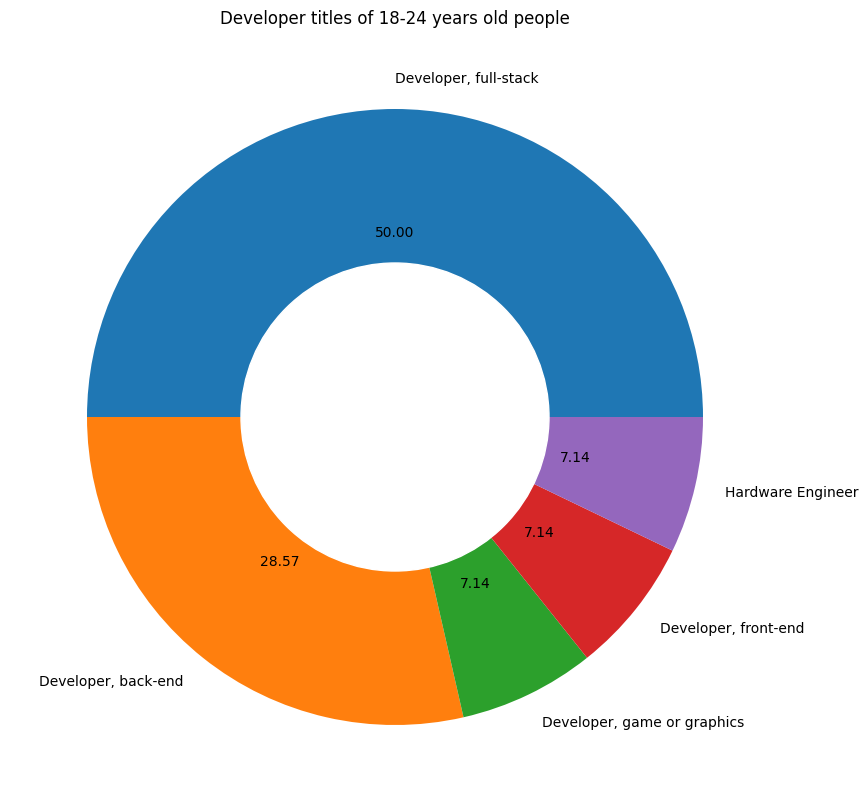

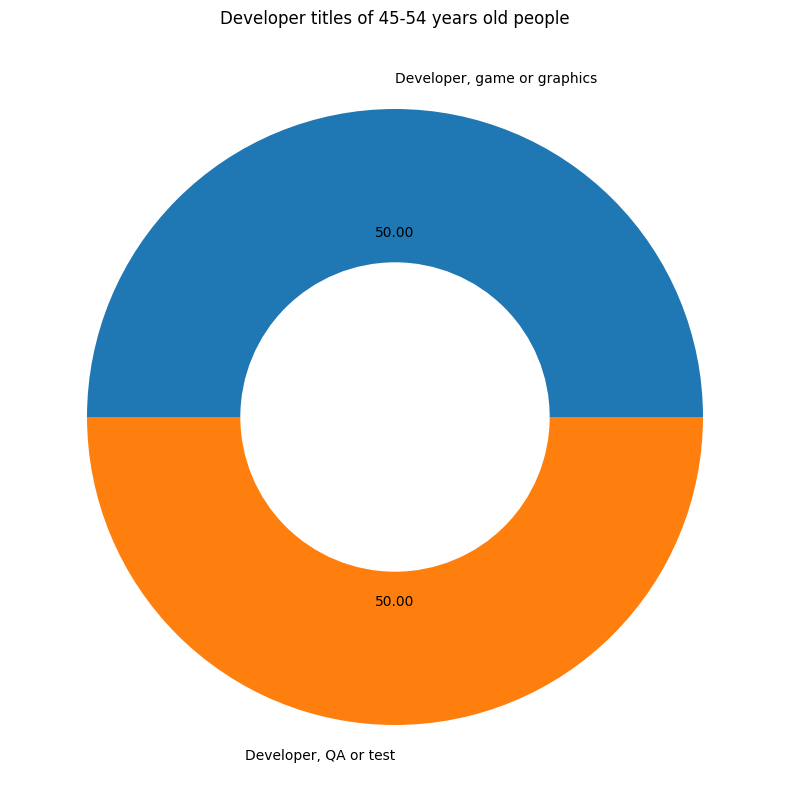

In [80]:
age_groups = np.array(georgia_data["Age"].value_counts().index)
for i in age_groups:
    plt.figure(figsize=(15,10))
    circle = plt.Circle((0,0),0.5,color = "white")
    plt.pie(np.array(georgia_data[georgia_data["Age"] == i]["DevType"].value_counts(normalize=True).values[:8]), labels = np.array(georgia_data[georgia_data["Age"] == i]["DevType"].value_counts(normalize=True).index[:8]), autopct='%.2f')
    p = plt.gcf()
    p.gca().add_artist(circle)
    plt.title("Developer titles of {} people".format(i))
    plt.show()

Most popular Educational Level


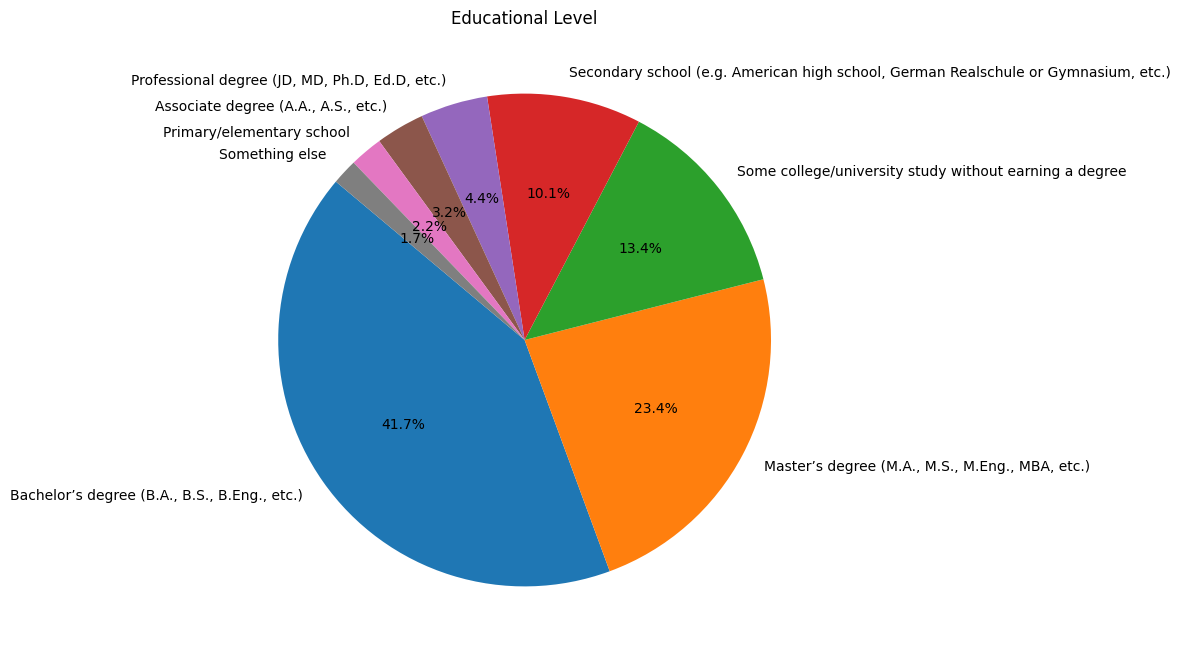

In [79]:
category_counts = df['EdLevel'].value_counts()
plt.figure(figsize=(8, 8))


plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Educational Level')

plt.show()